Accuracy: 0.4828510182207931
Confusion Matrix:
[[112  14  11  37   6  10  18   8   5]
 [ 17  72  19  13  26  20  15  12   2]
 [  2   8 109  11  25  28  28   8   1]
 [ 21   3   4 129   6   8  10   9   1]
 [  7  21  39   3  90  22  11  12   1]
 [ 20   9  22  21   5  90  19   7   0]
 [ 18  24  20  34  13  40  47  18   6]
 [  8   6   9  22   9  16  22 101  31]
 [  3   2   3  10   1   4   1  20 151]]


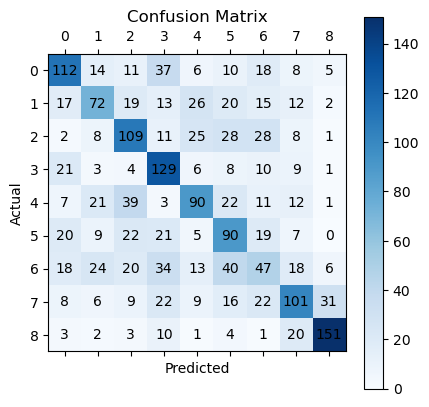

In [16]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Define the directory containing your files
directory = '/Users/jnaysha/Desktop/Naysha\'s work/Courses/Physics/Music Machine Learning/Results_smallFMA'

label_mapping = {
    "results_electronic.txt": 0,
    "results_experimental.txt": 1,
    "results_folk.txt": 2,
    "results_hiphop.txt": 3,
    "results_instrumental.txt": 4,
    "results_international.txt": 5,
    "results_pop.txt": 6,
    "results_rock.txt": 7,
    "results_punk.txt": 8
}

# label_mapping = {
#     "rock_results.txt": 0,
#     "metal_results.txt": 1,
#     "punk_results.txt": 2,
#     "Ourpunk_results.txt": 3
# }

# Reading all the data from the files into separate dataframes
dataframes = []
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, sep='\t')
        dataframes.append(df)

# Find the size of the smallest dataset
min_size = min(len(df) for df in dataframes)

# Sample each dataframe to match the size of the smallest dataset
sampled_dataframes = [df.sample(n=min_size, random_state=42) if len(df) > min_size else df for df in dataframes]

# Concatenate the sampled dataframes into a single dataframe
df = pd.concat(sampled_dataframes, ignore_index=True)

# Splitting the data into features (x) and target variable (y)
X = df.drop(columns=['label'])
y = df['label']

#Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plotting the confusion matrix with annotations
plt.matshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Adding annotations
for (i, j), value in np.ndenumerate(conf_matrix):
    plt.text(j, i, f'{value}', ha='center', va='center', color='black')

plt.show()


